In [10]:
import sys
!{sys.executable} -m pip install tensorflow



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [13]:

# Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


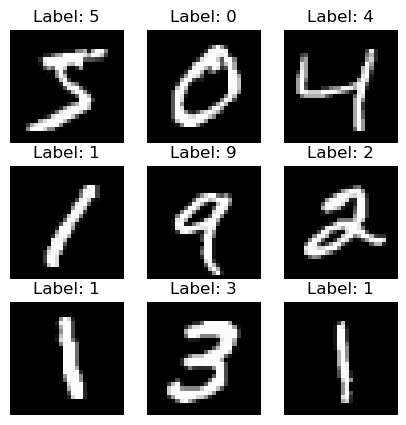

In [15]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [18]:
# Scale pixel values from [0,255] → [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape (28,28) → (28,28,1) to add channel dimension
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("After reshaping:", x_train.shape, x_test.shape)


After reshaping: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")   # 10 output classes (0–9)
])

model.summary()


C:\Users\kalpn\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [21]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.1122 - loss: 2.3015 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3019


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1135 - loss: 2.3011
Test Accuracy: 11.35%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


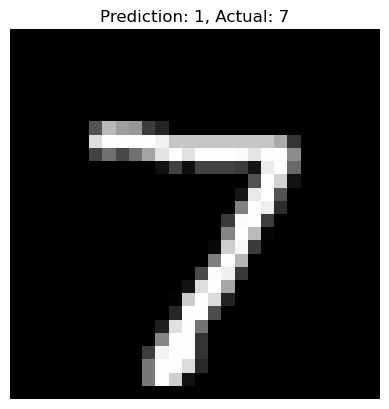

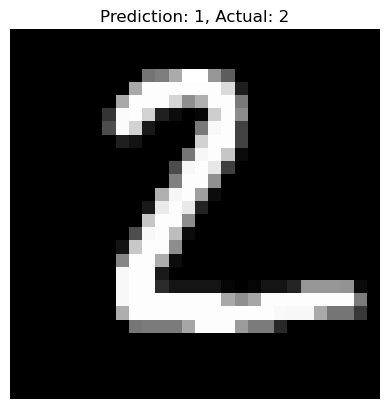

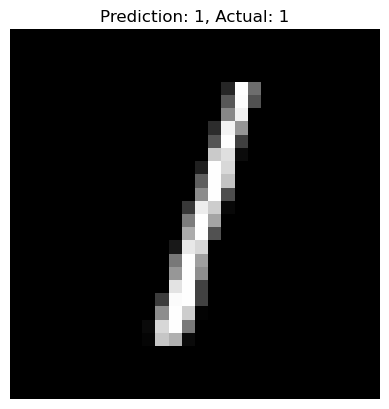

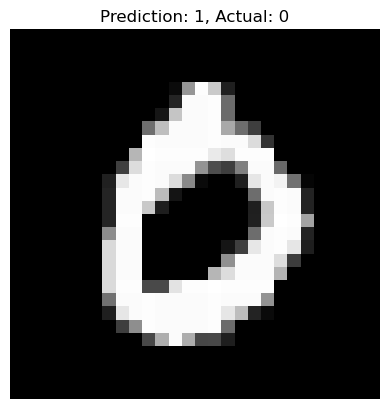

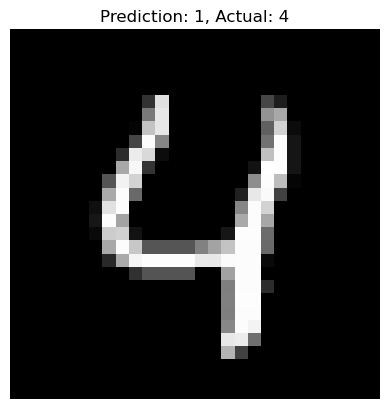

In [23]:
predictions = model.predict(x_test)

# Show first 5 predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Prediction: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis("off")
    plt.show()
